In [1]:
import os
import config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
d_300_path = os.path.join(config.DATA_DIR, '300_P')
clnf_au = os.path.join(d_300_path, '300_CLNF_AUs.txt')
clnf_ft = os.path.join(d_300_path, '300_CLNF_features.txt')
clnf_ft_3d = os.path.join(d_300_path, '300_CLNF_features3D.txt')
clnf_gz = os.path.join(d_300_path, '300_CLNF_gaze.txt')
clnf_hg = os.path.join(d_300_path, '300_CLNF_hog.txt')
clnf_ps = os.path.join(d_300_path, '300_CLNF_pose.txt')
covarep = os.path.join(d_300_path, '300_COVAREP.csv')
formant = os.path.join(d_300_path, '300_FORMANT.csv')
transcript = os.path.join(d_300_path, '300_TRANSCRIPT.csv')

## CLNF_features

In [30]:
ft_df = pd.read_csv(clnf_ft, sep=', ', engine='python', encoding='utf-8')

In [31]:
ft_x = ft_df.filter(like='x').T
ft_y = ft_df.filter(like='y').T
df_lst = []
for i in range(10):
    temp = pd.DataFrame({'X':ft_x[i].values, 'Y':ft_y[i].values})
    df_lst.append(temp)

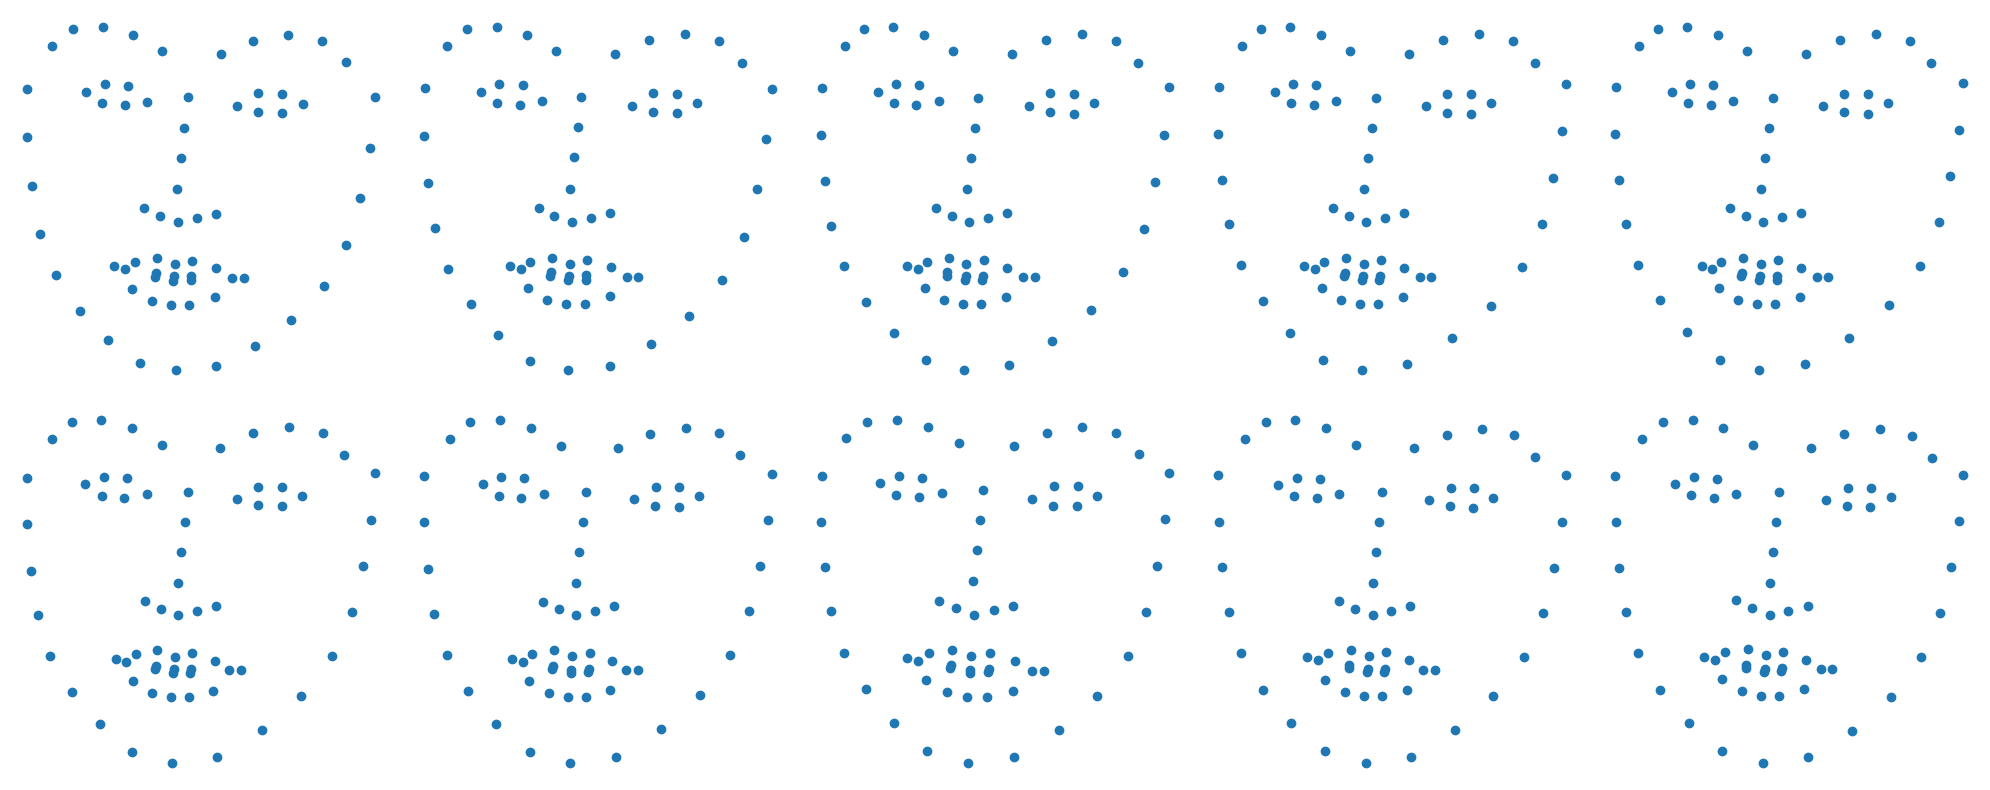

In [35]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for i in range(10):
    row = i//5
    col = i%5
    target_df = df_lst[i]
    ax[row, col].scatter(x=target_df['X']*(-1), y=target_df['Y']*(-1))
    ax[row, col].set_axis_off()
plt.tight_layout()
plt.show()

## CLNF_3d

In [71]:
ft_3d_df = pd.read_csv(clnf_ft_3d, sep=', ', engine='python', encoding='utf-8')

In [75]:
ft_3d_x = ft_3d_df.filter(like='X').T
ft_3d_y = ft_3d_df.filter(like='Y').T
ft_3d_z = ft_3d_df.filter(like='Z').T

df_lst = []
for i in range(10):
    temp = pd.DataFrame({'X':ft_3d_x[i].values, 'Y':ft_3d_y[i].values, 'Z':ft_3d_z[i].values})
    df_lst.append(temp)

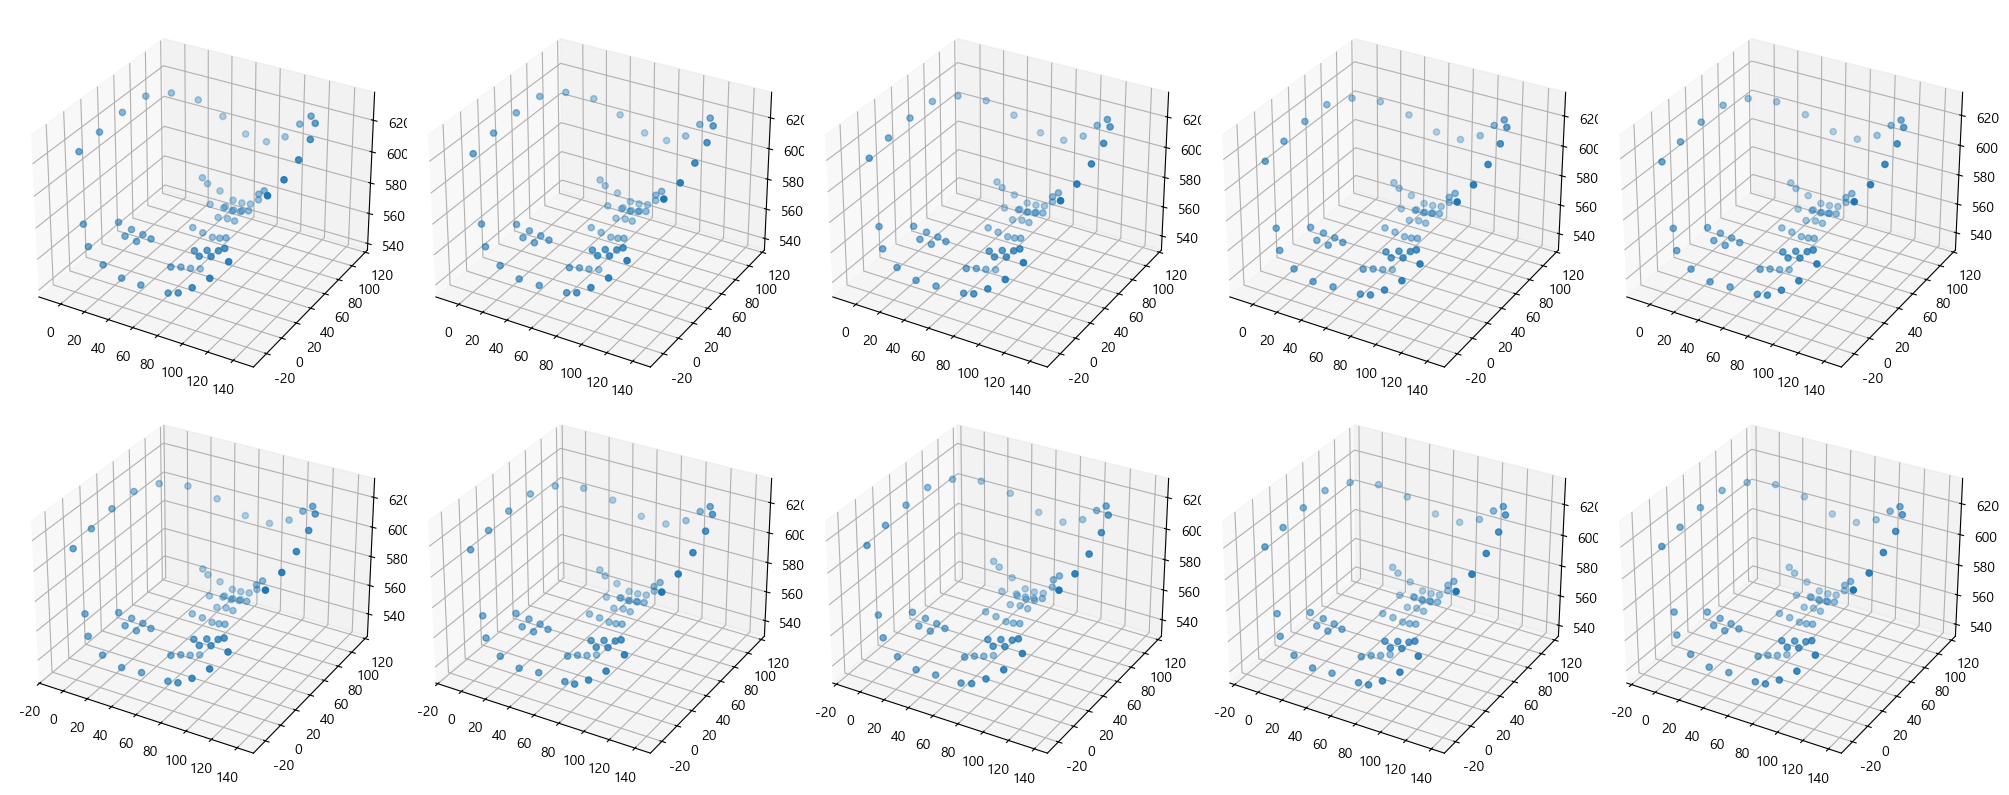

In [80]:
fig = plt.figure(figsize=(20, 8))
for i in range(10):
    row = i//5
    col = i%5
    target_df = df_lst[i]
    ax = fig.add_subplot(2, 5, i + 1, projection='3d')
    ax.scatter(xs=target_df['X'], ys=target_df['Y'], zs=target_df['Z'])
plt.tight_layout()
plt.show()

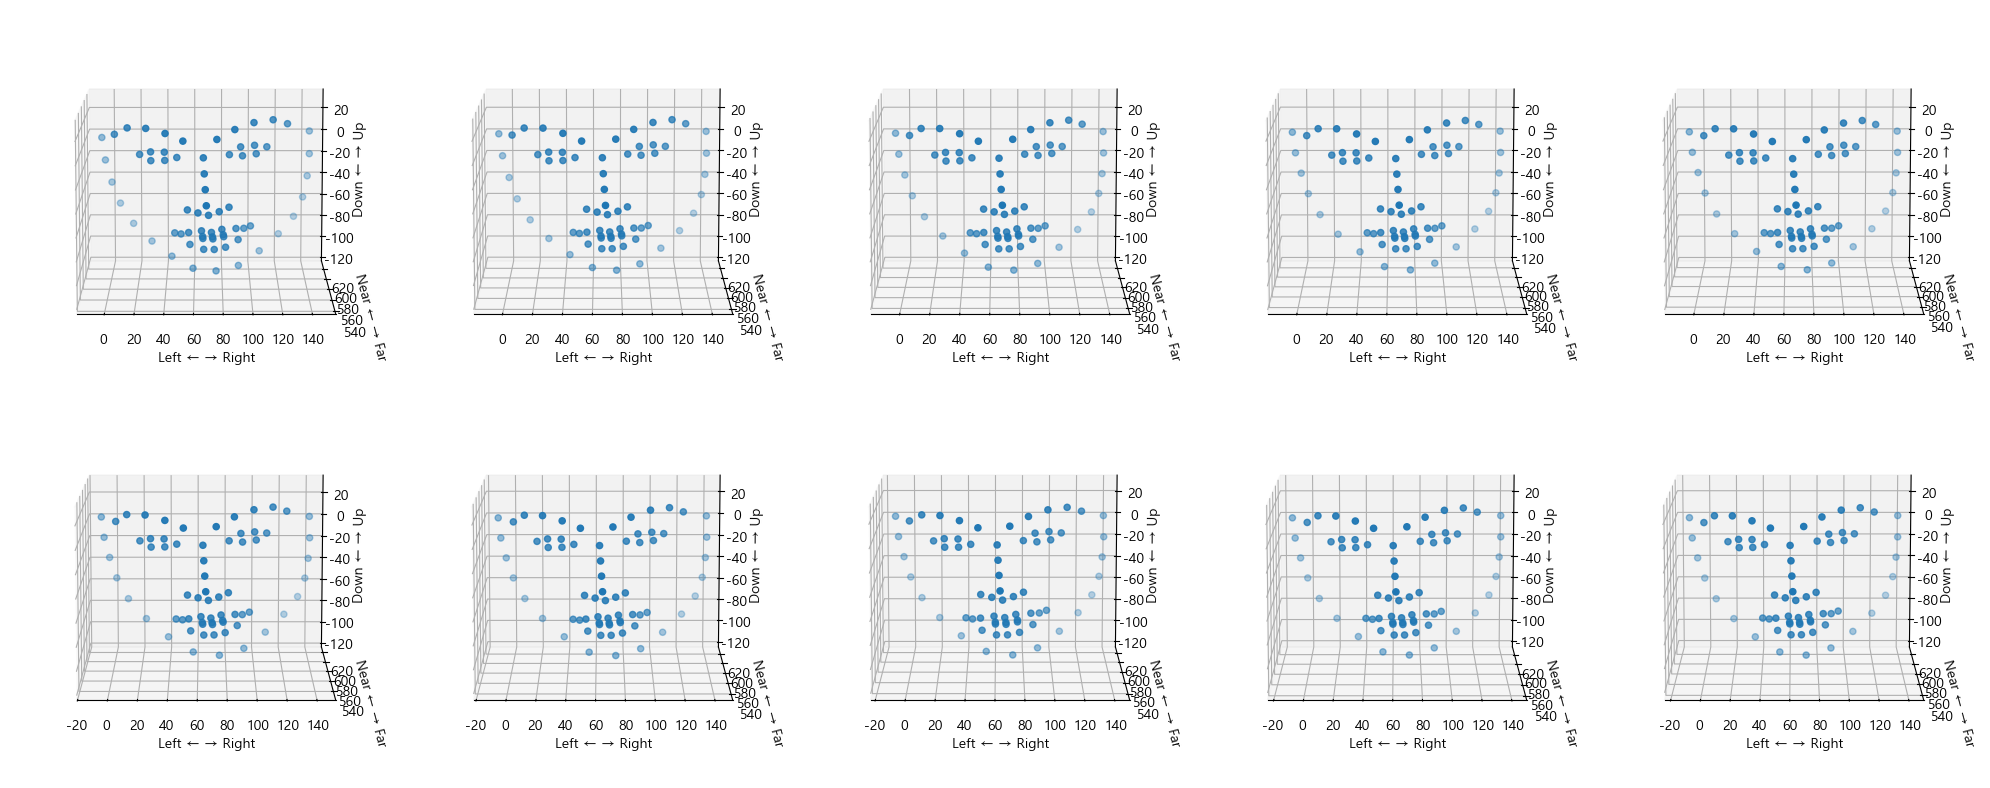

In [81]:
fig = plt.figure(figsize=(20, 8))
for i in range(10):
    target_df = df_lst[i]
    ax = fig.add_subplot(2, 5, i + 1, projection='3d')
    
    # 카메라 정면 뷰: X(좌우), Z(깊이)를 Y로, Y(상하)를 Z로
    ax.scatter(xs=target_df['X'],      # 좌우 유지
               ys=target_df['Z'],      # 깊이 → 수평(앞뒤)
               zs=-target_df['Y'])     # 위아래 반전 (Y↓ → Z↑)
    
    # 축 레이블
    ax.set_xlabel('Left ← → Right')
    ax.set_ylabel('Near ← → Far')
    ax.set_zlabel('Down ← → Up')
    
    # 뷰 각도 조정 (정면에서 약간 위에서 보기)
    ax.view_init(elev=10, azim=-90)
    
plt.tight_layout()
plt.show()

## CLNF_AUs

In [36]:
au_df = pd.read_csv(clnf_au, sep=', ', engine='python', encoding='utf-8')

In [40]:
au_r = au_df.filter(like='_r')
au_c = au_df.filter(like='_c')

In [41]:
print(len(au_r.columns), len(au_c.columns))

14 6


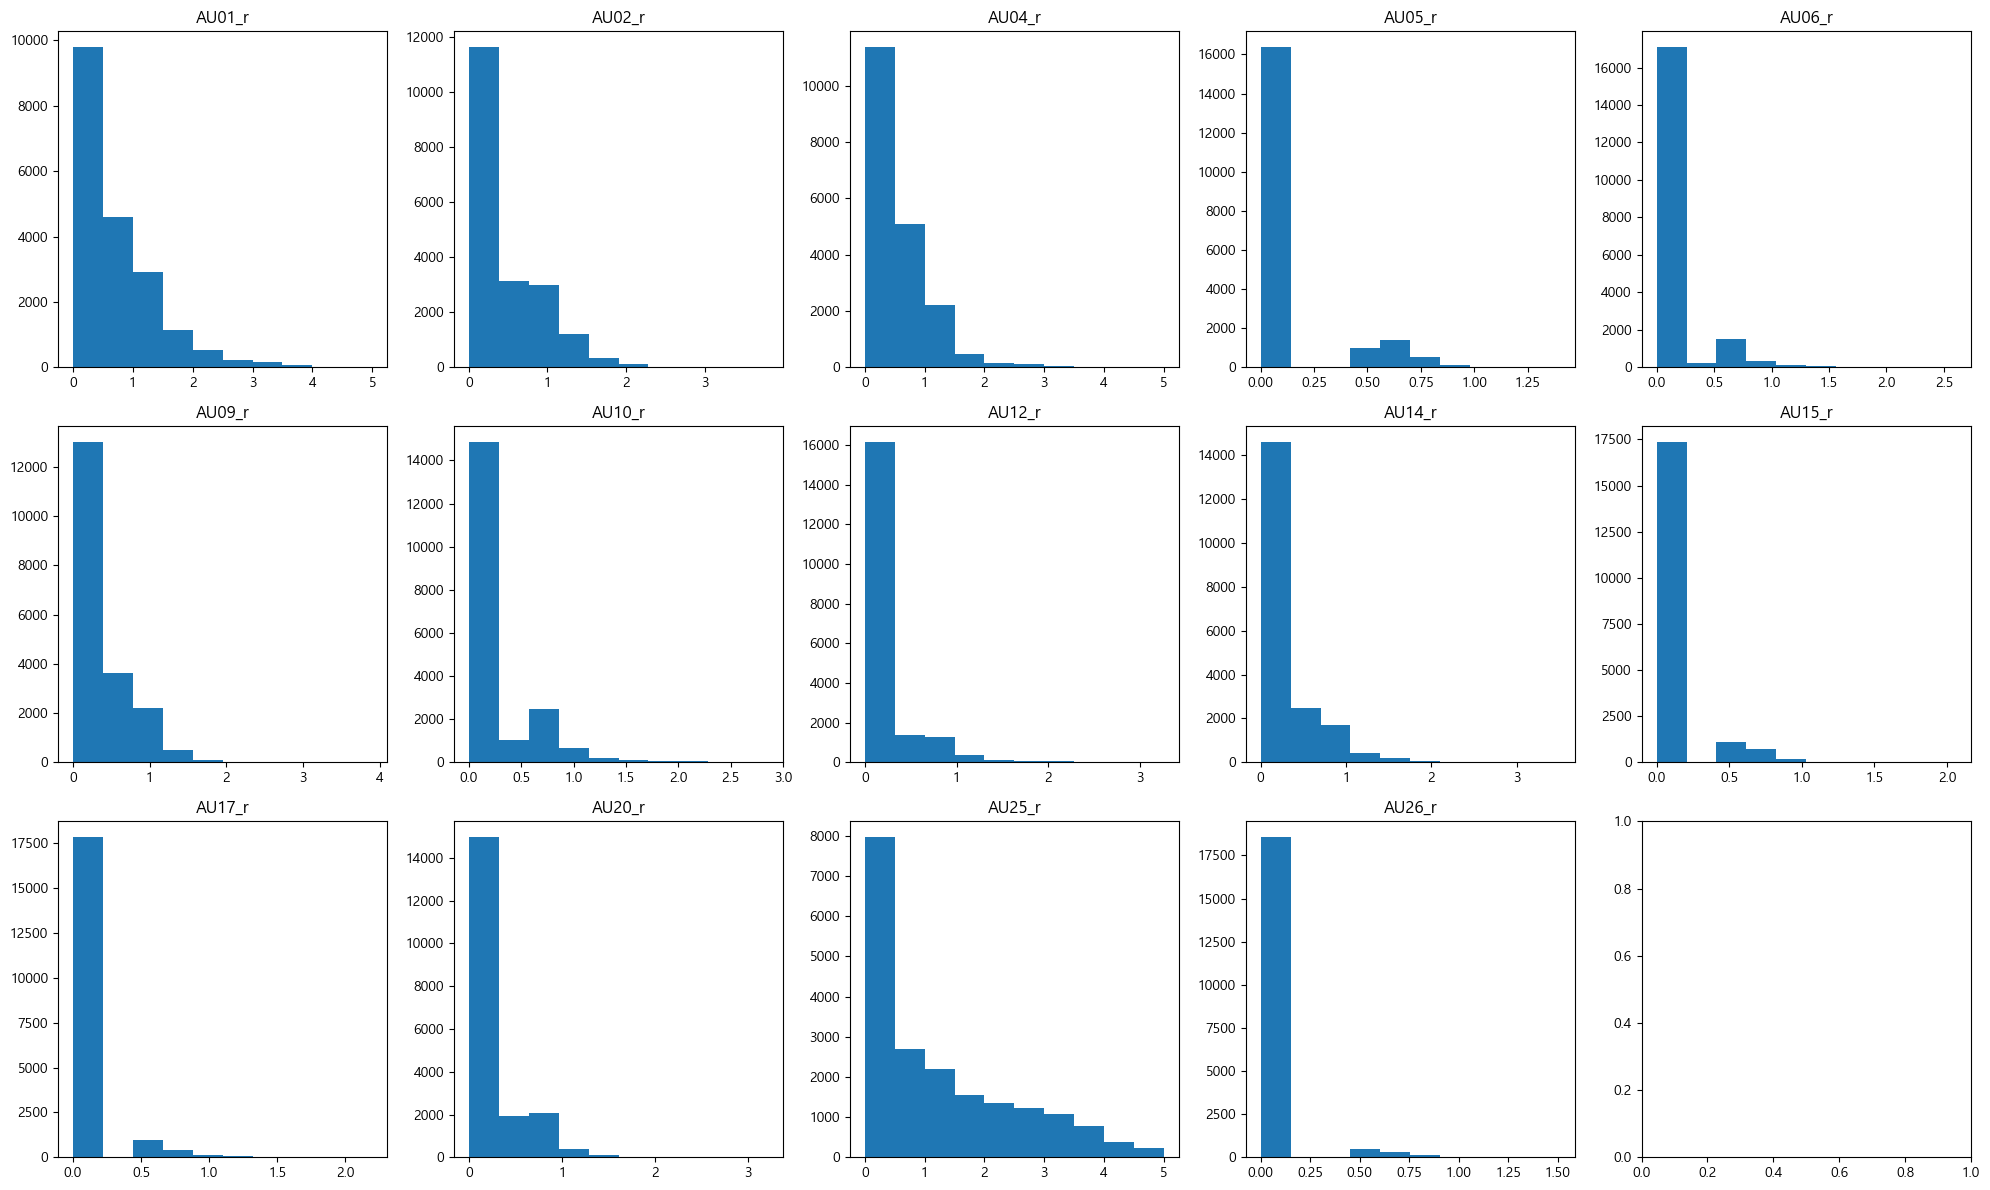

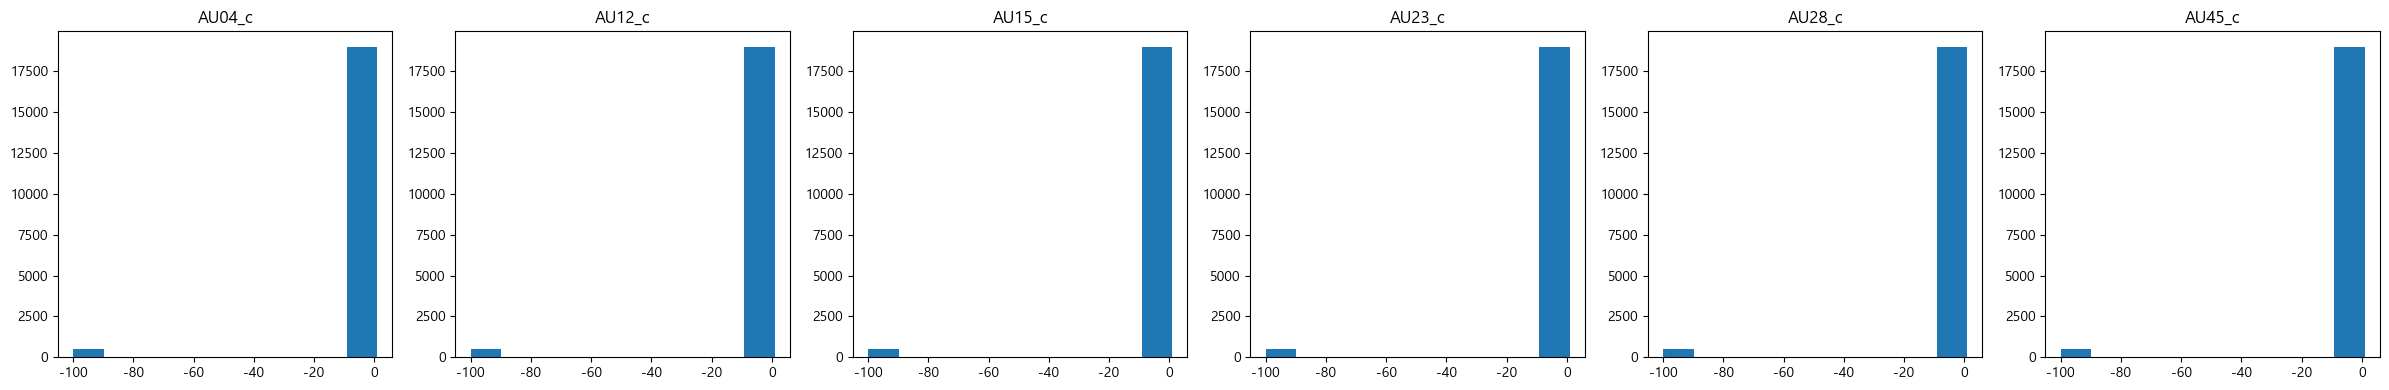

In [57]:
fig, ax = plt.subplots(3,5, figsize=(20, 12))


for i in range(14):
    row = i//5
    col = i%5
    target_df = au_r.iloc[:, i]
    title = au_r.columns[i]
    ax[row, col].hist(target_df)
    ax[row, col].set_title(title)
plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots(1,6, figsize=(24,4))
for i in range(6):
    target_df = au_c.iloc[:, i]
    title = au_c.columns[i]
    ax2[i].hist(target_df)
    ax2[i].set_title(title)
plt.tight_layout()
plt.show()
    

## CLNF gaze

In [3]:
gz_df = pd.read_csv(clnf_gz, sep=',', engine='python', encoding='utf-8')

In [4]:
gz_df.columns

Index(['frame', ' timestamp', ' confidence', ' success', ' x_0', ' y_0',
       ' z_0', ' x_1', ' y_1', ' z_1', ' x_h0', ' y_h0', ' z_h0', ' x_h1',
       ' y_h1', ' z_h1'],
      dtype='object')

In [5]:
condition_include = gz_df.columns.str.contains('_')
condition_exclude = ~gz_df.columns.str.contains('h')
final_mask = condition_include & condition_exclude
gz_raw = gz_df.loc[:, final_mask]
gz_h = gz_df.filter(like='h')

In [45]:
display(gz_raw.iloc[0])
display(gz_h.iloc[0])

x_0   -0.029688
y_0    0.180642
z_0   -0.983101
x_1   -0.232945
y_1    0.217617
z_1   -0.947829
Name: 0, dtype: float64

x_h0    0.060326
y_h0    0.386610
z_h0   -0.920268
x_h1   -0.143155
y_h1    0.428261
z_h1   -0.892244
Name: 0, dtype: float64

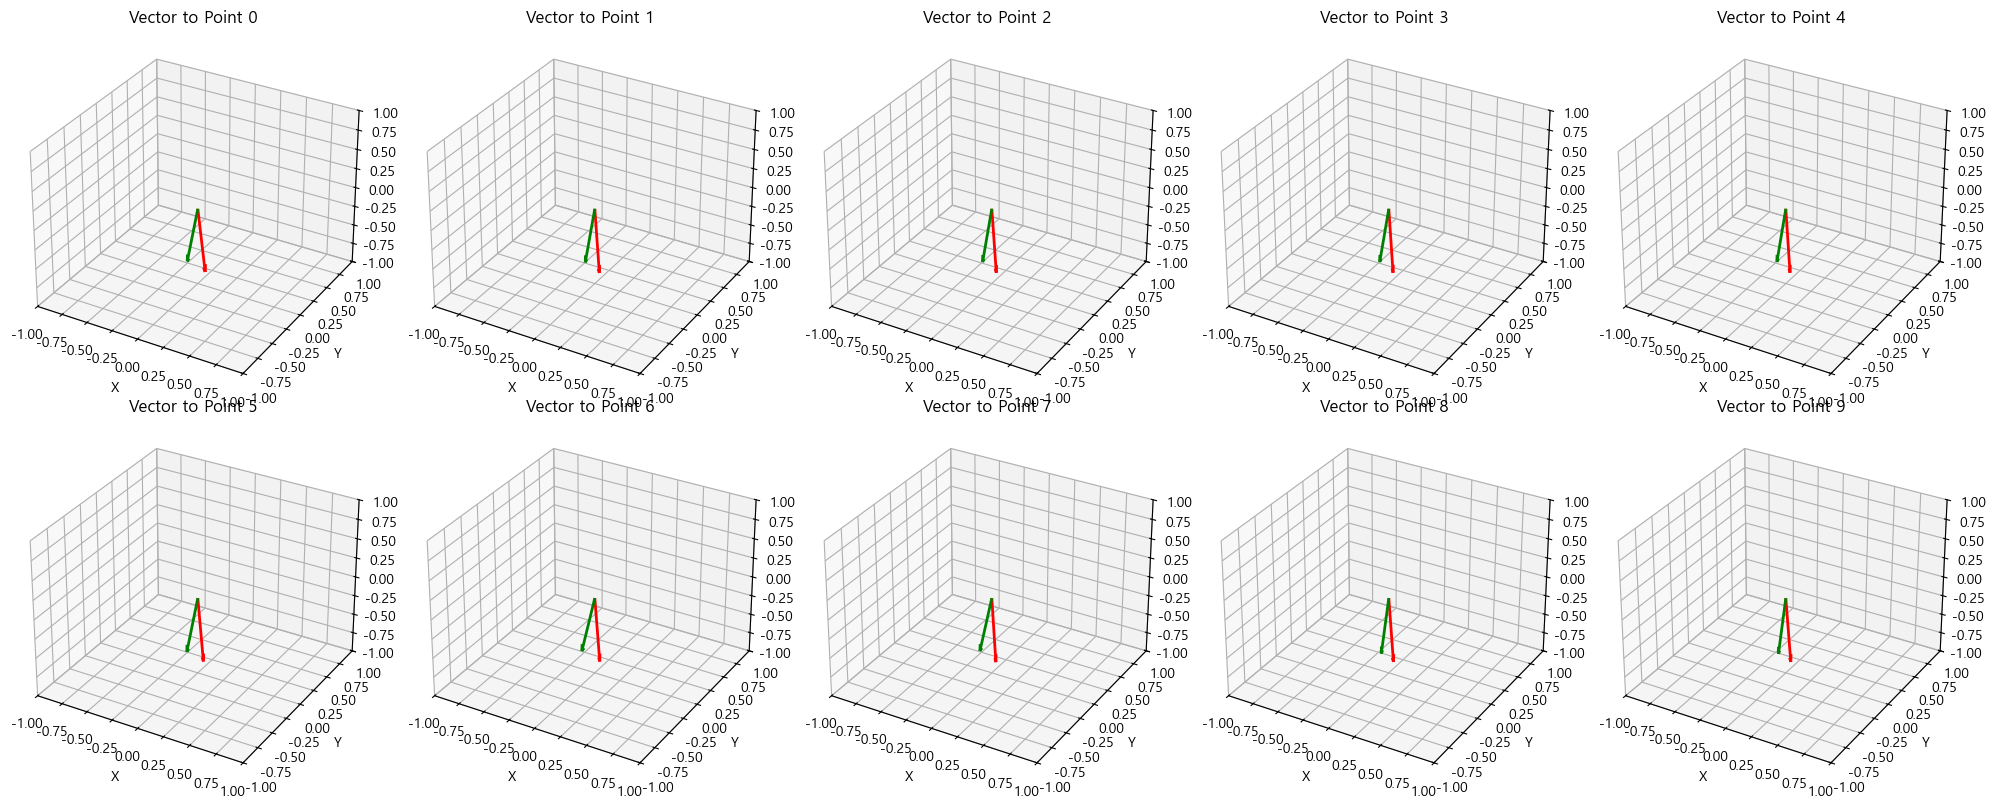

In [ ]:
fig = plt.figure(figsize=(20, 8)) 

for i in range(10):
    col = i % 5
    row = i // 5
    
    # 3D 서브플롯을 추가하고 axes 객체를 'ax'에 할당합니다.
    # fig.add_subplot(행의 총 수, 열의 총 수, 현재 위치, projection='3d')
    ax = fig.add_subplot(2, 5, i + 1, projection='3d')
    
    # 데이터 포인트 추출 (화살표의 끝점)
    x = gz_raw.iloc[i, 0]
    y = gz_raw.iloc[i, 1]
    z = gz_raw.iloc[i, 2]

    x2 = gz_raw.iloc[i, 3]
    y2 = gz_raw.iloc[i, 4]
    z2 = gz_raw.iloc[i, 5]

    ax.quiver(0, 0, 0, x, y, z, 
              color='r',            # 화살표 색상 (빨간색)
              arrow_length_ratio=0.1, # 화살표 머리 길이 비율
              linewidth=2)
    ax.quiver(0, 0, 0, x2, y2, z2, 
              color='g',            # 화살표 색상 (초록색)
              arrow_length_ratio=0.1, # 화살표 머리 길이 비율
              linewidth=2)

    # 축 범위 설정 (3D이므로 zlim도 추가)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1]) 
    
    ax.set_title(f'Vector to Point {i}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# 전체 플롯 레이아웃 조정
plt.tight_layout()
plt.show()

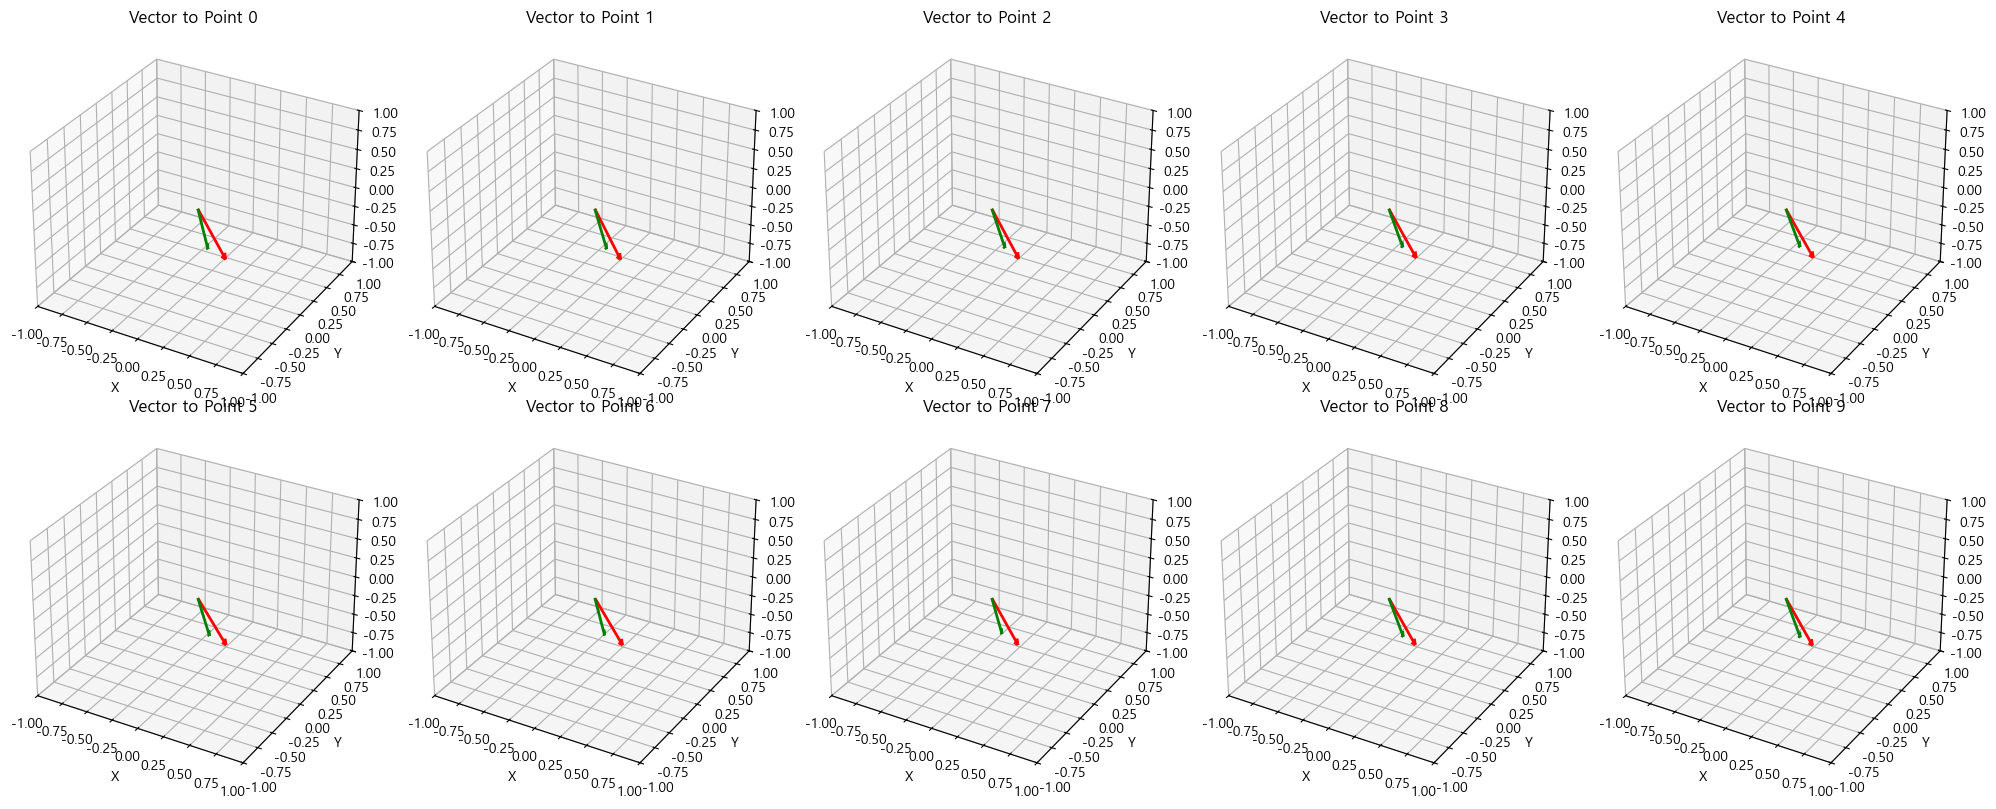

In [9]:
fig = plt.figure(figsize=(20, 8)) 

for i in range(10):
    col = i % 5
    row = i // 5
    
    # 3D 서브플롯을 추가하고 axes 객체를 'ax'에 할당합니다.
    # fig.add_subplot(행의 총 수, 열의 총 수, 현재 위치, projection='3d')
    ax = fig.add_subplot(2, 5, i + 1, projection='3d')
    
    # 데이터 포인트 추출 (화살표의 끝점)
    x = gz_h.iloc[i, 0]
    y = gz_h.iloc[i, 1]
    z = gz_h.iloc[i, 2]

    x2 = gz_h.iloc[i, 3]
    y2 = gz_h.iloc[i, 4]
    z2 = gz_h.iloc[i, 5]

    ax.quiver(0, 0, 0, x, y, z, 
              color='r',            # 화살표 색상 (빨간색)
              arrow_length_ratio=0.1, # 화살표 머리 길이 비율
              linewidth=2)
    ax.quiver(0, 0, 0, x2, y2, z2, 
              color='g',            # 화살표 색상 (초록색)
              arrow_length_ratio=0.1, # 화살표 머리 길이 비율
              linewidth=2)

    # 축 범위 설정 (3D이므로 zlim도 추가)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1]) 
    
    ax.set_title(f'Vector to Point {i}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# 전체 플롯 레이아웃 조정
plt.tight_layout()
plt.show()

100%|██████████| 19458/19458 [05:41<00:00, 57.05it/s]


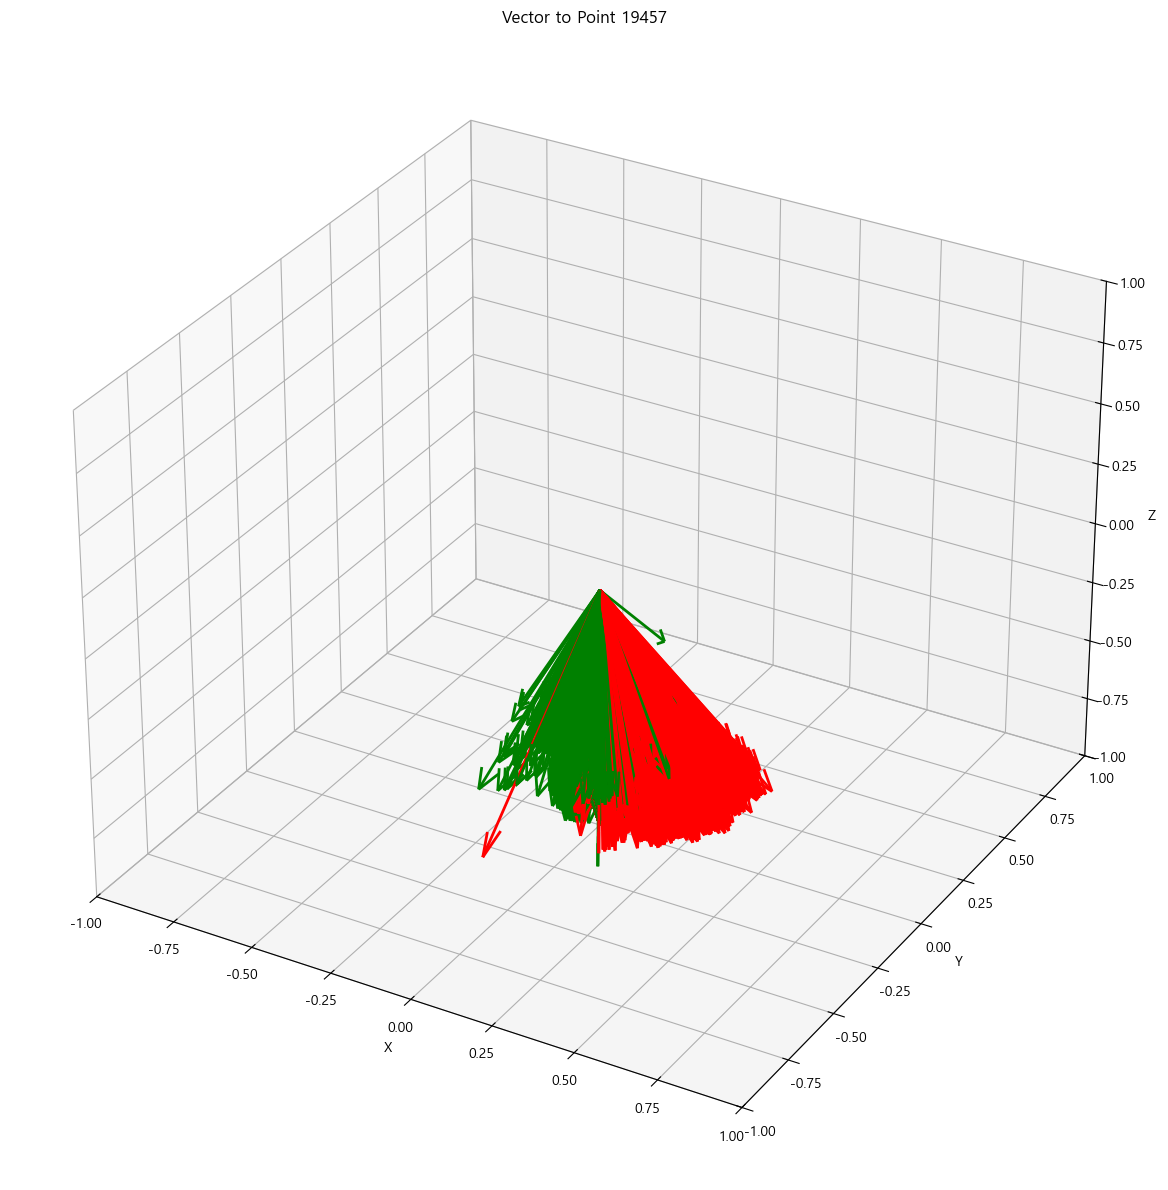

In [13]:
from tqdm.auto import tqdm

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for i in tqdm(range(len(gz_raw))):
    
    # 데이터 포인트 추출 (화살표의 끝점)
    x = gz_raw.iloc[i, 0]
    y = gz_raw.iloc[i, 1]
    z = gz_raw.iloc[i, 2]

    x2 = gz_raw.iloc[i, 3]
    y2 = gz_raw.iloc[i, 4]
    z2 = gz_raw.iloc[i, 5]

    ax.quiver(0, 0, 0, x, y, z, 
              color='r',            # 화살표 색상 (빨간색)
              arrow_length_ratio=0.1, # 화살표 머리 길이 비율
              linewidth=2)
    ax.quiver(0, 0, 0, x2, y2, z2, 
              color='g',            # 화살표 색상 (초록색)
              arrow_length_ratio=0.1, # 화살표 머리 길이 비율
              linewidth=2)

# 축 범위 설정 (3D이므로 zlim도 추가)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1]) 

ax.set_title(f'Vector to Point {i}')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 전체 플롯 레이아웃 조정
plt.tight_layout()
plt.show()

## CLNF pose

In [26]:
ps_df = pd.read_csv(clnf_ps, sep=', ', engine='python', encoding='utf-8')

In [27]:
ps_t = ps_df.filter(like='T')
ps_r = ps_df.filter(like='R')

In [28]:
print(ps_t.max(), ps_t.min())

Tx    186.540
Ty    380.142
Tz    818.616
dtype: float64 Tx   -124.5910
Ty    -73.7271
Tz    344.2370
dtype: float64


In [29]:
ps_r

,Rx,Ry,Rz
0,0.203683,-0.088582,-0.050478
1,0.218002,-0.090140,-0.048800
2,0.229491,-0.095551,-0.043008
3,0.240995,-0.097895,-0.038246
4,0.243577,-0.098172,-0.036744
...,...,...,...
19453,0.441858,-0.093022,-0.228571
19454,0.430105,-0.082108,-0.212567
19455,0.458600,-0.079041,-0.192886
19456,0.473191,-0.077877,-0.174793


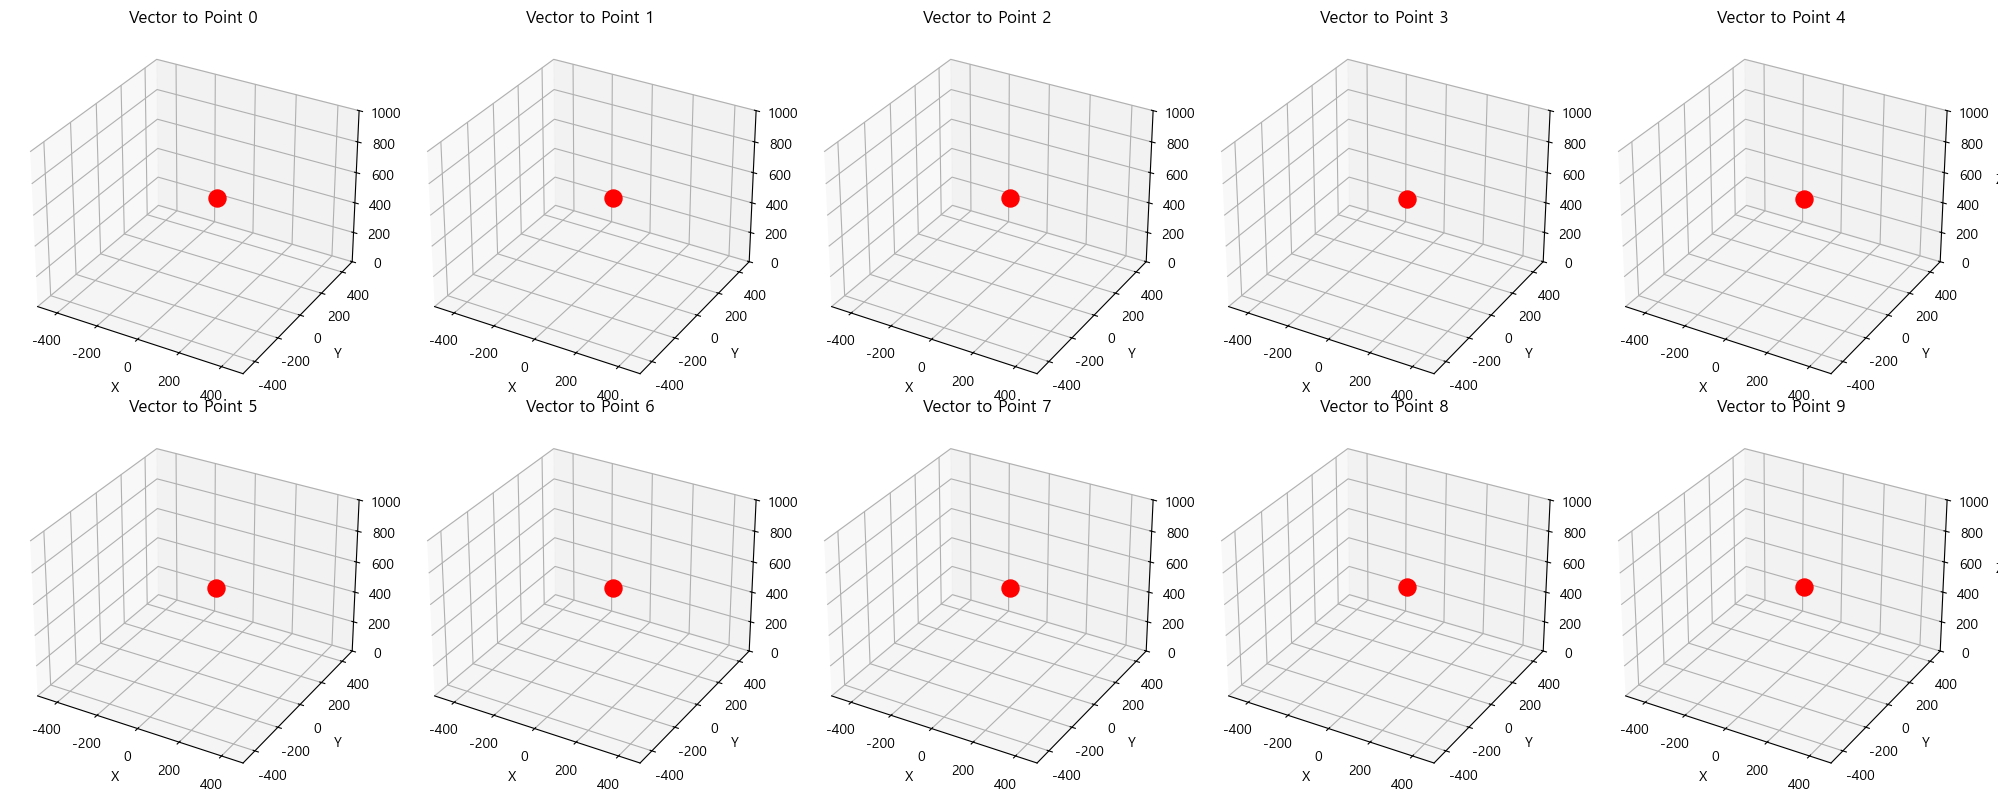

In [ ]:
fig = plt.figure(figsize=(20, 8)) 

for i in range(10):
    col = i % 5
    row = i // 5
    
    ax = fig.add_subplot(2, 5, i + 1, projection='3d')
    
    # 데이터 포인트 추출 (화살표의 끝점)
    x = ps_t.iloc[i, 0]
    y = ps_t.iloc[i, 1]
    z = ps_t.iloc[i, 2]

    rx = ps_r.iloc[i, 0]
    ry = ps_r.iloc[i, 1]
    rz = ps_r.iloc[i, 2]

    ax.scatter(x, y, z, color='r', s=150)

    # 축 범위 설정 (3D이므로 zlim도 추가)
    ax.set_xlim([-500, 500])
    ax.set_ylim([-500, 500])
    ax.set_zlim([0, 1000]) 
    
    ax.set_title(f'Vector to Point {i}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# 전체 플롯 레이아웃 조정
plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

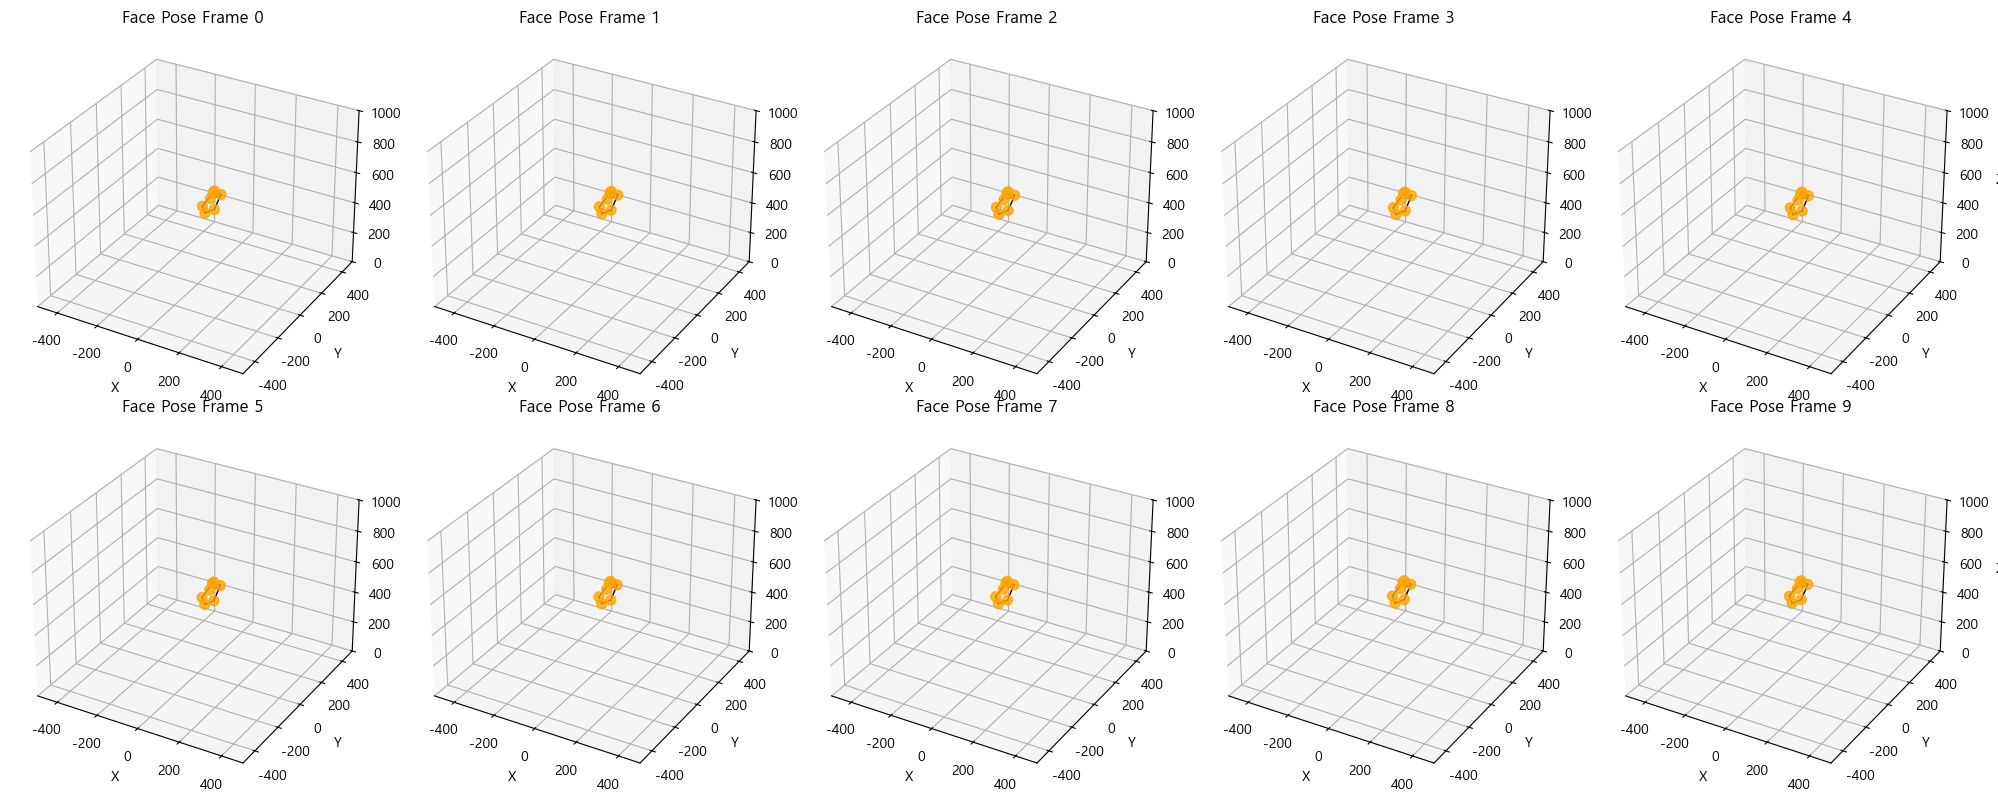

In [32]:
from scipy.spatial.transform import Rotation as R

fig = plt.figure(figsize=(20, 8)) 

# Shape: (N, 3)
HEAD_TEMPLATE = np.array([
    [0, 0, 50],    # 코끝 (Nose Tip)
    [20, 10, 20],  # 오른쪽 눈 (Right Eye)
    [-20, 10, 20], # 왼쪽 눈 (Left Eye)
    [0, -40, 30],  # 입 중심 (Mouth Center)
    [30, -70, -10], # 오른쪽 턱 (Right Jaw)
    [-30, -70, -10], # 왼쪽 턱 (Left Jaw)
    [0, -100, -20]  # 턱 끝 (Chin)
])

# 시각화를 위해 일부 점을 연결할 인덱스 정의 (선 연결)
CONNECTIONS = [
    (0, 2), (0, 1), # 코 - 눈 연결
    (1, 4), (2, 5), # 눈 - 턱선 연결
    (4, 6), (5, 6)  # 턱선 연결
]

# 3D 축 (Axis)을 정의하는 기본 벡터 (X: 빨강, Y: 초록, Z: 파랑)
# 이 벡터들은 회전 행렬에 곱해져 회전된 축의 방향을 결정합니다.
BASE_VECTORS = np.array([
    [1, 0, 0], # X-axis
    [0, 1, 0], # Y-axis
    [0, 0, 1]  # Z-axis (일반적으로 얼굴 정면)
])
# 쿼버(quiver) 화살표의 길이 스케일 (mm 단위)
QUIVER_SCALE = 100

fig = plt.figure(figsize=(20, 8)) 

for i in range(10):
    col = i % 5
    row = i // 5
    
    ax = fig.add_subplot(2, 5, i + 1, projection='3d')
    
    # 위치 데이터 (Translation)
    T = np.array([ps_t.iloc[i, 0], ps_t.iloc[i, 1], ps_t.iloc[i, 2]])
    
    # 회전 데이터 (Rotation, 라디안)
    rx = ps_r.iloc[i, 0]
    ry = ps_r.iloc[i, 1]
    rz = ps_r.iloc[i, 2]
    
    # 2. Euler 각을 Rotation 객체로 변환 (Z Y X 순서 가정)
    rotation = R.from_euler('zyx', [rz, ry, rx], degrees=False)
    
    # 3. 랜드마크에 회전 적용
    # rotation.apply(HEAD_TEMPLATE)는 (N, 3) 배열을 받아서 회전합니다.
    rotated_landmarks = rotation.apply(HEAD_TEMPLATE)
    
    # 4. 회전된 랜드마크에 위치(Translation) 적용
    # 모든 점을 T 벡터만큼 평행 이동시킵니다.
    transformed_landmarks = rotated_landmarks + T
    
    # 5. 시각화
    
    # A. 랜드마크 점 표시 (Scatter)
    X_pts = transformed_landmarks[:, 0]
    Y_pts = transformed_landmarks[:, 1]
    Z_pts = transformed_landmarks[:, 2]
    
    ax.scatter(X_pts, Y_pts, Z_pts, 
               color='orange', s=50, alpha=0.8, label='Landmarks')

    # B. 랜드마크 연결 (Line Plot)
    for start, end in CONNECTIONS:
        # 두 점을 연결하는 선을 그립니다.
        ax.plot([X_pts[start], X_pts[end]],
                [Y_pts[start], Y_pts[end]],
                [Z_pts[start], Z_pts[end]],
                color='k', linewidth=1)

    # C. 얼굴의 정면 방향 (Z축) 화살표 추가 (선택 사항)
    # Z축 (0, 0, 1)이 회전된 방향을 따라 화살표를 그립니다.
    face_direction = rotation.apply(np.array([0, 0, 1])) * 50 # 50mm 길이
    ax.quiver(T[0], T[1], T[2], 
              face_direction[0], face_direction[1], face_direction[2],
              color='b', linewidth=3, arrow_length_ratio=0.3)


    # 축 범위 설정 (머리 위치와 방향 화살표를 모두 포함하도록)
    ax.set_xlim([-500, 500])
    ax.set_ylim([-500, 500])
    ax.set_zlim([0, 1000]) 
    
    # 3D 뷰 조정: 얼굴이 정면을 바라보는 것처럼 보이도록 설정
    # ax.view_init(elev=20, azim=45) # 원하는 뷰 각도로 설정
    
    ax.set_title(f'Face Pose Frame {i}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
# 전체 플롯 레이아웃 조정
plt.tight_layout()
plt.show()

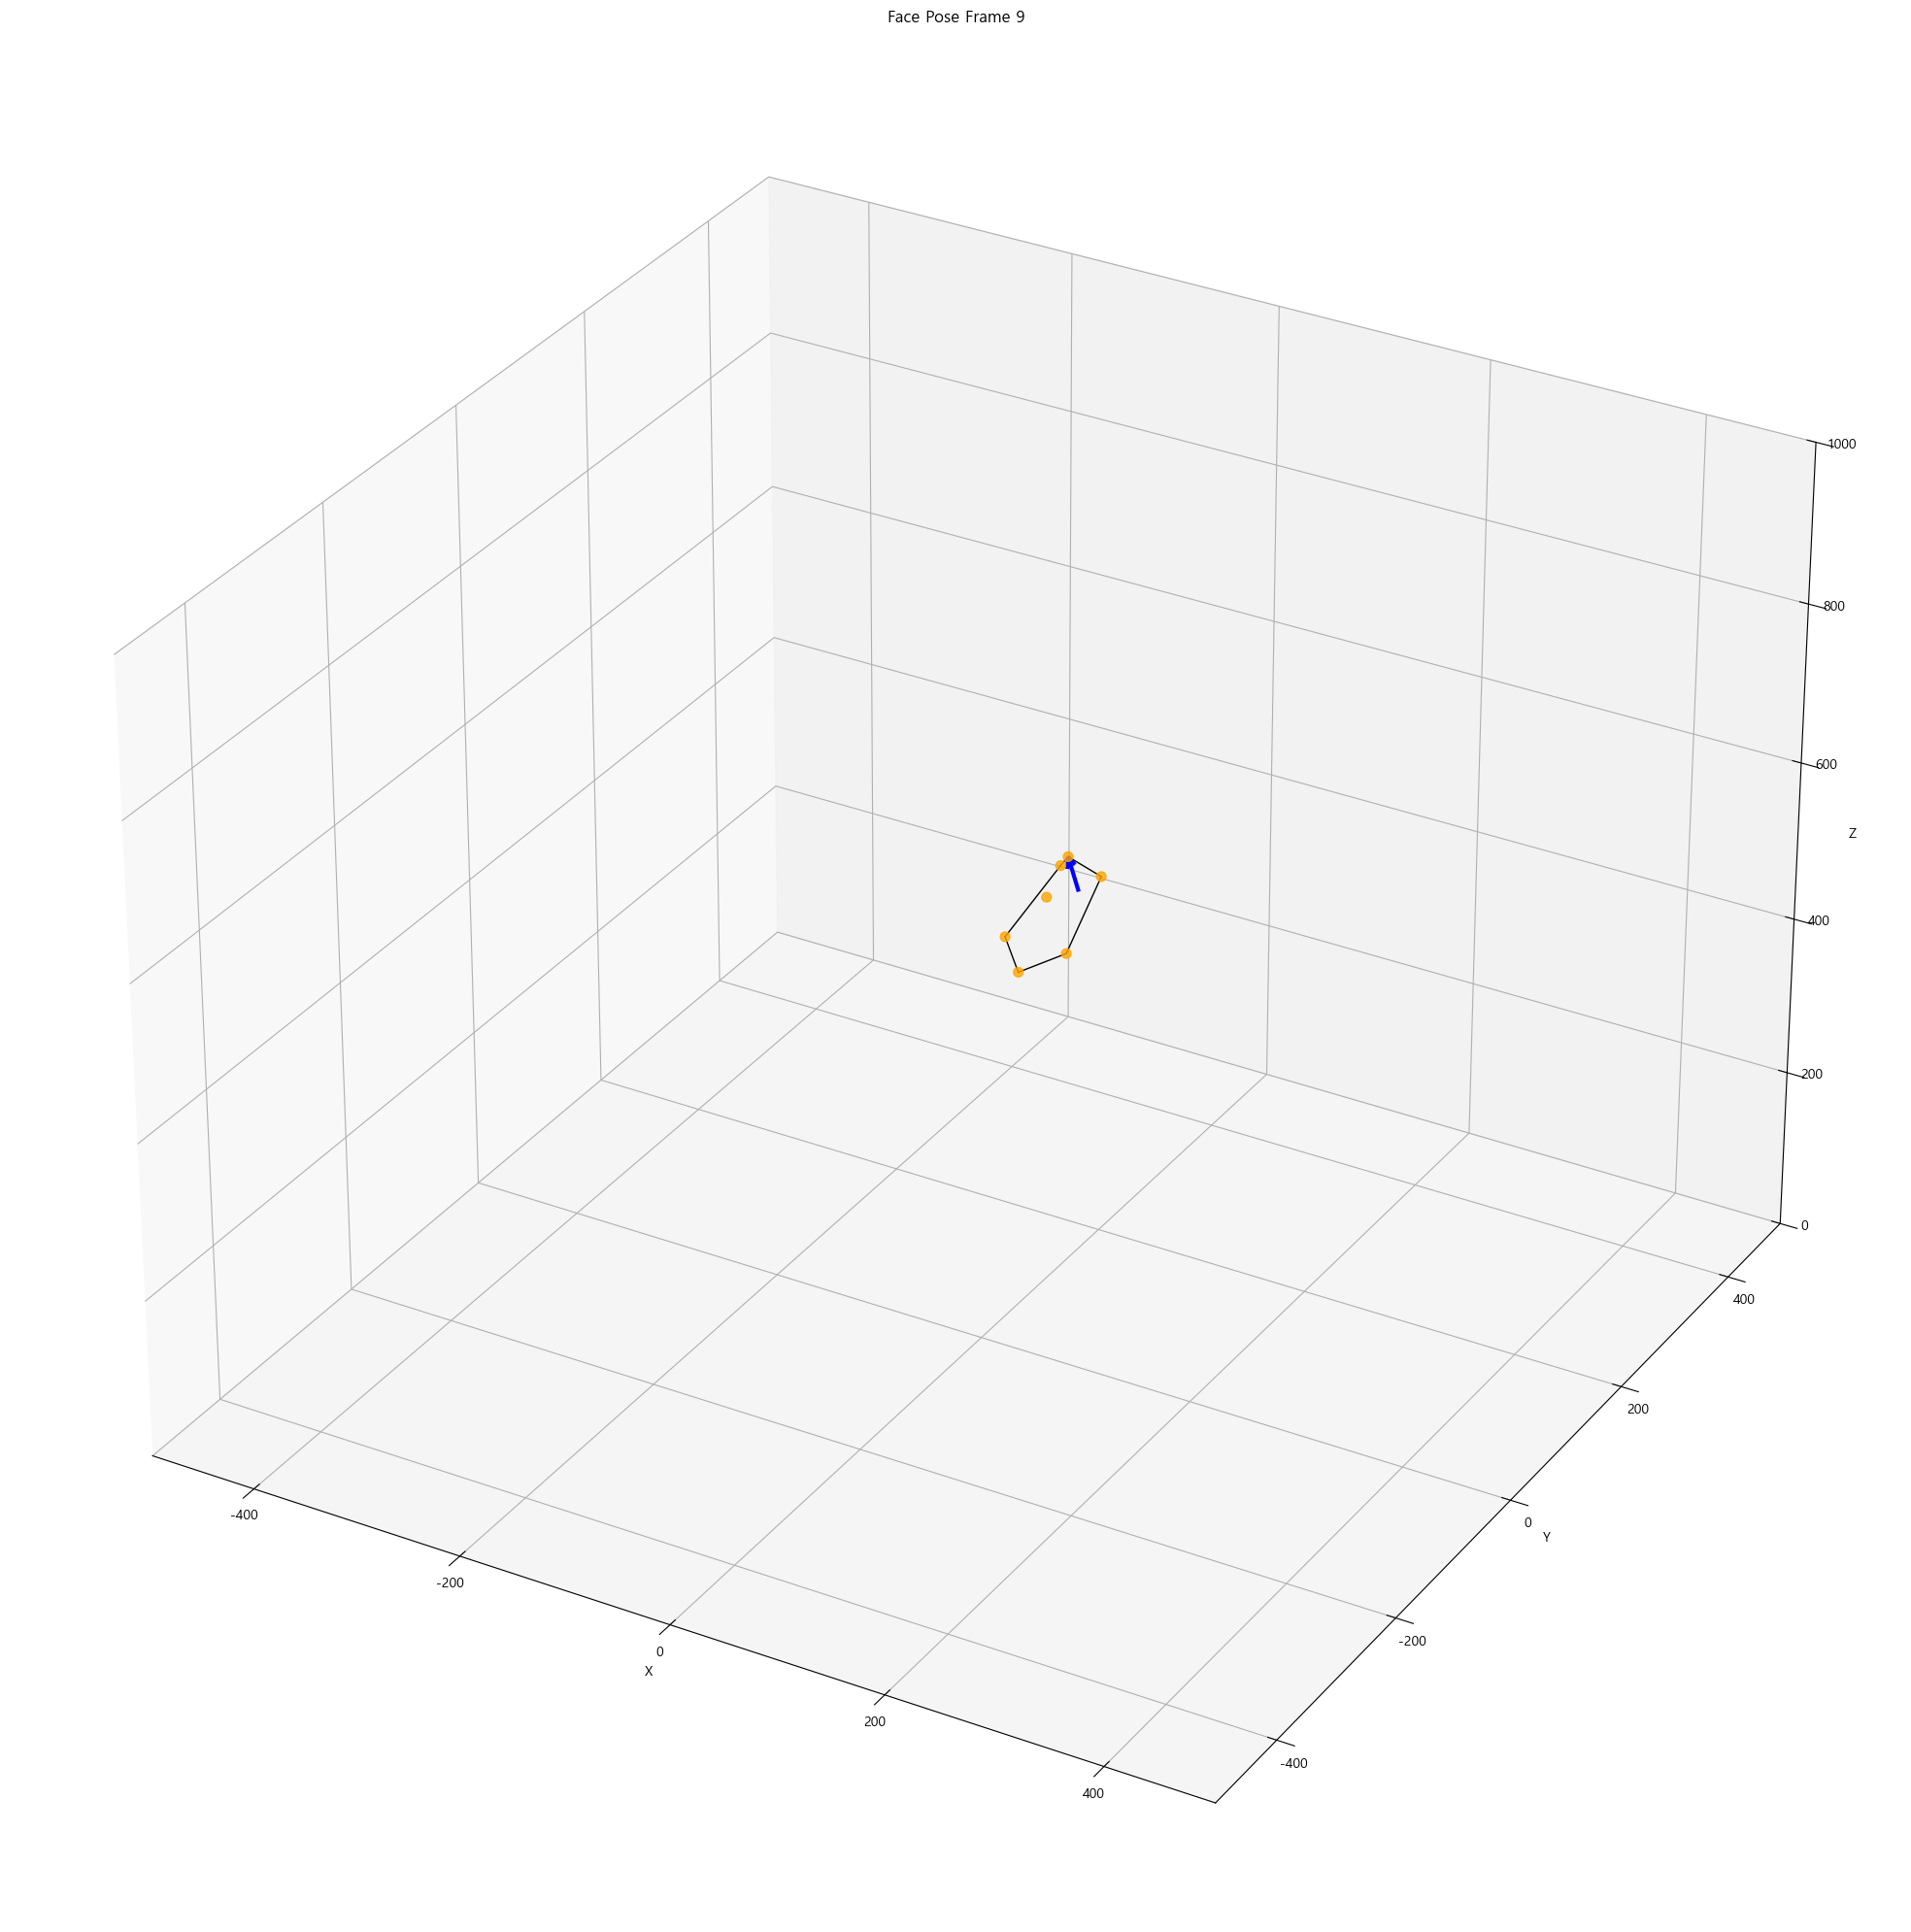

In [41]:
from scipy.spatial.transform import Rotation as R

fig = plt.figure(figsize=(20, 20)) 

# Shape: (N, 3)
HEAD_TEMPLATE = np.array([
    [0, 0, 50],    # 코끝 (Nose Tip)
    [20, 10, 20],  # 오른쪽 눈 (Right Eye)
    [-20, 10, 20], # 왼쪽 눈 (Left Eye)
    [0, -40, 30],  # 입 중심 (Mouth Center)
    [30, -70, -10], # 오른쪽 턱 (Right Jaw)
    [-30, -70, -10], # 왼쪽 턱 (Left Jaw)
    [0, -100, -20]  # 턱 끝 (Chin)
])

# 시각화를 위해 일부 점을 연결할 인덱스 정의 (선 연결)
CONNECTIONS = [
    (0, 2), (0, 1), # 코 - 눈 연결
    (1, 4), (2, 5), # 눈 - 턱선 연결
    (4, 6), (5, 6)  # 턱선 연결
]

# 3D 축 (Axis)을 정의하는 기본 벡터 (X: 빨강, Y: 초록, Z: 파랑)
# 이 벡터들은 회전 행렬에 곱해져 회전된 축의 방향을 결정합니다.
BASE_VECTORS = np.array([
    [1, 0, 0], # X-axis
    [0, 1, 0], # Y-axis
    [0, 0, 1]  # Z-axis (일반적으로 얼굴 정면)
])
# 쿼버(quiver) 화살표의 길이 스케일 (mm 단위)
QUIVER_SCALE = 100

ax = fig.add_subplot(111, projection='3d')

# 위치 데이터 (Translation)
T = np.array([ps_t.iloc[0, 0], ps_t.iloc[0, 1], ps_t.iloc[0, 2]])

# 회전 데이터 (Rotation, 라디안)
rx = ps_r.iloc[0, 0]
ry = ps_r.iloc[0, 1]
rz = ps_r.iloc[0, 2]

# 2. Euler 각을 Rotation 객체로 변환 (Z Y X 순서 가정)
rotation = R.from_euler('XYZ', [rx, ry, rz], degrees=False)

# 3. 랜드마크에 회전 적용
# rotation.apply(HEAD_TEMPLATE)는 (N, 3) 배열을 받아서 회전합니다.
rotated_landmarks = rotation.apply(HEAD_TEMPLATE)

# 4. 회전된 랜드마크에 위치(Translation) 적용
# 모든 점을 T 벡터만큼 평행 이동시킵니다.
transformed_landmarks = rotated_landmarks + T

# 5. 시각화

# A. 랜드마크 점 표시 (Scatter)
X_pts = transformed_landmarks[:, 0]
Y_pts = transformed_landmarks[:, 1]
Z_pts = transformed_landmarks[:, 2]

ax.scatter(X_pts, Y_pts, Z_pts, 
            color='orange', s=50, alpha=0.8, label='Landmarks')

# B. 랜드마크 연결 (Line Plot)
for start, end in CONNECTIONS:
    # 두 점을 연결하는 선을 그립니다.
    ax.plot([X_pts[start], X_pts[end]],
            [Y_pts[start], Y_pts[end]],
            [Z_pts[start], Z_pts[end]],
            color='k', linewidth=1)

# C. 얼굴의 정면 방향 (Z축) 화살표 추가 (선택 사항)
# Z축 (0, 0, 1)이 회전된 방향을 따라 화살표를 그립니다.
face_direction = rotation.apply(np.array([0, 0, 1])) * 50 # 50mm 길이
ax.quiver(T[0], T[1], T[2], 
            face_direction[0], face_direction[1], face_direction[2],
            color='b', linewidth=3, arrow_length_ratio=0.3)


# 축 범위 설정 (머리 위치와 방향 화살표를 모두 포함하도록)
ax.set_xlim([-500, 500])
ax.set_ylim([-500, 500])
ax.set_zlim([0, 1000]) 

# 3D 뷰 조정: 얼굴이 정면을 바라보는 것처럼 보이도록 설정
# ax.view_init(elev=20, azim=45) # 원하는 뷰 각도로 설정

ax.set_title(f'Face Pose Frame {i}')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 전체 플롯 레이아웃 조정
plt.tight_layout()
plt.show()

In [42]:
print(f"Rx (pitch): {rx:.3f} rad = {np.degrees(rx):.1f}°")
print(f"Ry (yaw): {ry:.3f} rad = {np.degrees(ry):.1f}°")
print(f"Rz (roll): {rz:.3f} rad = {np.degrees(rz):.1f}°")

Rx (pitch): 0.204 rad = 11.7°
Ry (yaw): -0.089 rad = -5.1°
Rz (roll): -0.050 rad = -2.9°


## Integration

In [90]:
ft_df = pd.read_csv(clnf_ft, sep=', ', engine='python', encoding='utf-8')
ft_3d_df = pd.read_csv(clnf_ft_3d, sep=', ', engine='python', encoding='utf-8')
au_df = pd.read_csv(clnf_au, sep=', ', engine='python', encoding='utf-8')
gz_df = pd.read_csv(clnf_gz, sep=',', engine='python', encoding='utf-8')
ps_df = pd.read_csv(clnf_ps, sep=', ', engine='python', encoding='utf-8')


ft_df.columns = 'ft' + ft_df.columns
ft_3d_df.columns = 'ft_3d' + ft_3d_df.columns
au_df.columns = 'au' + au_df.columns
gz_df.columns = 'gz' + gz_df.columns
ps_df.columns = 'ps' + ps_df.columns

0it [1:54:26, ?it/s]


In [91]:
uni_col = list(set(ft_df.columns) & set(au_df.columns))

In [92]:
uni = ft_df[uni_col]
ft_x = ft_df.filter(like='x')
ft_y = ft_df.filter(like='y')
ft_3d_x = ft_3d_df.filter(like='X')
ft_3d_y = ft_3d_df.filter(like='Y')
ft_3d_z = ft_3d_df.filter(like='Z')
au_r = au_df.filter(like='_r')
au_c = au_df.filter(like='_c')
condition_include = gz_df.columns.str.contains('_')
condition_exclude = ~gz_df.columns.str.contains('h')
final_mask = condition_include & condition_exclude
gz_raw = gz_df.loc[:, final_mask]
gz_h = gz_df.filter(like='h')
ps_t = ps_df.filter(like='T')
ps_r = ps_df.filter(like='R')

In [93]:
merged_df = pd.concat([uni, ft_x, ft_y, ft_3d_x, ft_3d_y, ft_3d_z, au_r, au_c, gz_raw, gz_h, ps_t, ps_r], axis=1)

In [94]:
merged_df.to_csv(os.path.join(config.DATA_DIR, '300_P', 'vision_summary.csv'))

## Visualize

In [100]:
sample_df = merged_df.iloc[[0], :]

In [104]:
ft_x = sample_df.filter(like='ftx')
ft_y = sample_df.filter(like='fty')
ft_3d_x = sample_df.filter(like='ft_3dX')
ft_3d_y = sample_df.filter(like='ft_3dY')
ft_3d_z = sample_df.filter(like='ft_3dZ')
au_r = sample_df.filter(like='au').filter(like='_r')
au_c = sample_df.filter(like='au').filter(like='_c')
gz_df = sample_df.filter(like='gz')
condition_include = gz_df.columns.str.contains('_')
condition_exclude = ~gz_df.columns.str.contains('h')
final_mask = condition_include & condition_exclude
gz_raw = gz_df.loc[:, final_mask]
gz_h = gz_df.filter(like='h')
ps_t = sample_df.filter(like='ps').filter(like='T')
ps_r = sample_df.filter(like='ps').filter(like='R')

In [109]:
ft_3d = pd.DataFrame({'X':np.squeeze(ft_3d_x.values), 'Y':np.squeeze(ft_3d_y.values), 'Z':np.squeeze(ft_3d_z.values)})

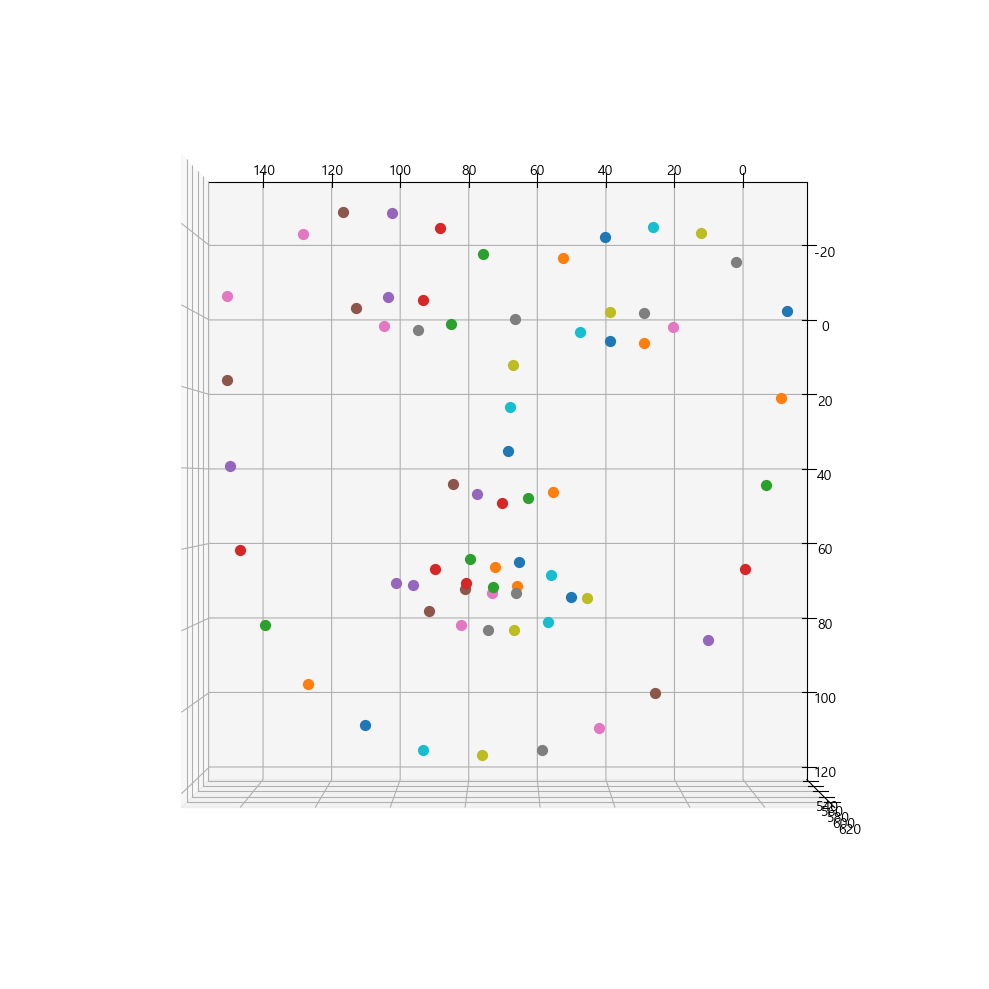

In [140]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(ft_3d)):
    x = ft_3d.iloc[i,0]
    y = ft_3d.iloc[i,1]
    z = ft_3d.iloc[i,2]
    ax.scatter(xs=x, ys=y, zs=z, s=50)
    ax.view_init(elev=90, azim=90)
plt.tight_layout()
plt.show()

In [98]:
sample_df

,success,confidence,frame,timestamp,x0,x1,x2,x3,x4,x5,...,z_h0,x_h1,y_h1,z_h1,Tx,Ty,Tz,Rx,Ry,Rz
0,1,0.939744,1,0.0,627.755,631.277,638.299,647.668,663.522,686.279,...,-0.920268,-0.143155,0.428261,-0.892244,69.3181,39.2286,575.033,0.203683,-0.088582,-0.050478
